# * Env Set

In [1]:
# pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
# pd.set_option('display.width', 1000)
# dfX_std_scaled_3area_pca_df

# * Importing Part

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier,\
                             AdaBoostClassifier, GradientBoostingClassifier
import xgboost
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, log_loss

# * Function Moduling Part

In [3]:
# encogin categorical values for further processing
def encode_cat(df):
    """
       Input : train_df 
       Output : encoded_train_df
    """
    # get categorical(type='object') variable
    cat_var_df = df.select_dtypes(include=['object']).copy()    
    
    cleanup_nums = {}
    
    # species columns encoding
    spe_index = 0
    spe_enc_dict = {}
    spe_enc_list = []
    for key in set(cat_var_df['species'].values):
        spe_enc_dict[key] = spe_index
        spe_index += 1
        
        # keep list for final recovery
        spe_enc_list.append(key)
    cleanup_nums['species'] = spe_enc_dict
    
    try:
        cat_var_df.replace(cleanup_nums, inplace=True)
    except:
        pass
    
    df = df.drop(cat_var_df.columns, axis=1)
    df = pd.concat([df, cat_var_df], axis=1)
    return df, spe_enc_list

# * Data handling Part

In [4]:
train_processed_df = pd.read_csv("datasets/processed_data/train_processed_df_20171121.csv")
test_processed_df = pd.read_csv("datasets/processed_data/test_processed_df_20171121.csv")

dfy, sub_list = encode_cat(pd.read_csv("datasets/original_data/train.csv")[['species']].copy())
dfy = dfy.iloc[:, 0]
dfX = train_processed_df.drop(['id', 'species'],axis=1).copy()

dfX_test = test_processed_df.drop(['id'],axis=1).copy()
test_id_df = test_processed_df['id'].copy()

In [5]:
print(train_processed_df.shape)
print(test_processed_df.shape)

print(dfX.shape)
print(dfy.shape)

(990, 249)
(594, 248)
(990, 247)
(990,)


In [6]:
train_processed_df.describe()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,margin41,margin42,margin43,margin44,margin45,margin46,margin47,margin48,margin49,margin50,margin51,margin52,margin53,margin54,margin55,margin56,margin57,margin58,margin59,margin60,margin61,margin62,margin63,margin64,shape1,shape2,shape3,shape4,shape5,shape6,shape7,shape8,shape9,shape10,shape11,shape12,shape13,shape14,shape15,shape16,shape17,shape18,shape19,shape20,shape21,shape22,shape23,shape24,shape25,shape26,shape27,shape28,shape29,shape30,shape31,shape32,shape33,shape34,shape35,shape36,shape37,shape38,shape39,shape40,shape41,shape42,shape43,shape44,shape45,shape46,shape47,shape48,shape49,shape50,shape51,shape52,shape53,shape54,shape55,shape56,shape57,shape58,shape59,shape60,shape61,shape62,shape63,shape64,texture1,texture2,texture3,texture4,texture5,texture6,texture7,texture8,texture9,texture10,texture11,texture12,texture13,texture14,texture15,texture16,texture17,texture18,texture19,texture20,texture21,texture22,texture23,texture24,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64,aspect_ratio,extent,solidity,ori_cols,ori_rows,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,id,species
count,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9

#   
# 2. Modeling, Optimization, Result & Discussion
- 2.1 Model selection & Optimization
- 2.2 Result & Discussion

## 2.1 Model selection & Optimization

### 2.1.1 Random Model Trial : Model setting 1

In [7]:
# models abbreviate 1
qda = QuadraticDiscriminantAnalysis()
mnb = MultinomialNB()
mnb_al2 = MultinomialNB(alpha=2.0)
gnb = GaussianNB()
lg = LogisticRegression()
lg_lbf_mul = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial')
dt_d10 = DecisionTreeClassifier(criterion='entropy', max_depth=10)
dt_d20 = DecisionTreeClassifier(criterion='entropy', max_depth=20)
vc_lr_gnb = VotingClassifier(estimators=[('lr',  LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial')), \
                                         ('gnb', GaussianNB())], voting='soft', weights=[1, 1])
bc_vc_lr_qda_gnb = BaggingClassifier(base_estimator=vc_lr_gnb, n_estimators=100, \
                                  bootstrap=True, bootstrap_features=True)
rc_d20_e1000 = RandomForestClassifier(max_depth=20, n_estimators=1000)
etc_m10_e500 = ExtraTreesClassifier(max_depth=10, n_estimators=500)
ab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5, random_state=0), 
                               algorithm="SAMME", n_estimators=100)
gc_d10_e100 = GradientBoostingClassifier(n_estimators=100, max_depth=10)
xb = xgboost.XGBClassifier(n_estimators=100, max_depth=10)
pt_iter500 = Perceptron(max_iter=500, eta0=0.1)
sgdc_ll_iter1000 = SGDClassifier(loss="log", max_iter=1000)
svc_c3_4_lin = SVC(C=0.75, kernel='linear')

In [8]:
# x should be positive : ['qda', qda],['mnb', mnb], ['mnb_al2', mnb_al2],
    
model_lst1 = [    
    ['gnb', gnb],
    ['lg', lg],
    ['lg_lbf_mul', lg_lbf_mul],
    ['dt_d10', dt_d10],
    ['dt_d20', dt_d20],
    ['vc_lr_gnb', vc_lr_gnb],    
    ['rc_d20_e1000', rc_d20_e1000],
    ['etc_m10_e500', etc_m10_e500],
    ['ab', ab],
    ['gc_d10_e100', gc_d10_e100 ],
    ['xb', xb],
    ['pt_iter500', pt_iter500],
    ['sgdc_ll_iter1000', sgdc_ll_iter1000],
    ['svc_c3_4_lin', svc_c3_4_lin]    
]

In [9]:
for model in model_lst1:
    print('='*50)
    print('Model : ', model[0])
    print(cross_val_score(model[1], dfX, dfy, scoring='accuracy', cv=5))

Model :  gnb
[ 0.61111111  0.57575758  0.50505051  0.55555556  0.52525253]
Model :  lg
[ 0.98989899  0.99494949  0.98484848  0.98484848  0.99494949]
Model :  lg_lbf_mul
[ 0.98484848  0.99494949  0.97979798  0.98989899  0.99494949]
Model :  dt_d10
[ 0.6969697   0.74747475  0.68181818  0.72222222  0.74747475]
Model :  dt_d20
[ 0.71717172  0.76767677  0.66161616  0.72727273  0.70707071]
Model :  vc_lr_gnb
[ 0.61111111  0.58585859  0.51010101  0.55555556  0.52525253]
Model :  rc_d20_e1000
[ 0.98989899  0.98484848  1.          0.97979798  0.98989899]
Model :  etc_m10_e500
[ 0.98989899  0.97474747  0.99494949  0.98989899  0.98484848]
Model :  ab
[ 0.55555556  0.61616162  0.54545455  0.44444444  0.56060606]
Model :  gc_d10_e100
[ 0.64646465  0.71717172  0.61111111  0.58080808  0.66666667]
Model :  xb
[ 0.88383838  0.92929293  0.88888889  0.88888889  0.91919192]
Model :  pt_iter500
[ 0.94444444  0.95959596  0.93939394  0.93939394  0.93939394]
Model :  sgdc_ll_iter1000
[ 0.94444444  0.96969697 

In [10]:
# infinity error : ['bc_vc_lr_qda_gnb', bc_vc_lr_qda_gnb],

model_lst2 = [
    ['lg_lbf_mul', lg_lbf_mul],
    ['rc_d20_e1000', rc_d20_e1000],
    ['etc_m10_e500', etc_m10_e500],
    ['ab', ab],
    ['gc_d10_e100', gc_d10_e100 ],
    ['xb', xb]
]

In [11]:
for model in model_lst2:
    print('='*50)
    print('Model : ', model[0])
    print(cross_val_score(model[1], dfX, dfy, scoring='neg_log_loss', cv=5))

Model :  lg_lbf_mul
[-0.1056897  -0.08524118 -0.11990966 -0.09848458 -0.07992318]
Model :  rc_d20_e1000
[-0.80465902 -0.81640703 -0.79724179 -0.78330102 -0.78491287]
Model :  etc_m10_e500
[-1.06364433 -1.06531911 -1.04932177 -1.04396717 -1.02626634]
Model :  ab
[-4.59450952 -4.59454706 -4.59453998 -4.59457203 -4.59451651]
Model :  gc_d10_e100
[-2.80102647 -2.15875677 -2.77647434 -3.09066866 -2.54733677]
Model :  xb
[-0.72302285 -0.66196963 -0.75339941 -0.81351869 -0.62569089]


### 2.1.2 Individual Model Optimizing : Model setting 2

### target : feedback from random trial
- lg_lbf_mul
- rc_d20_e1000
- etc_m10_e500 : 높은 수치를 보이나 랜덤포레스트와 유사성을 고려해 랜덤포레스트 하나로 테스트 진행
- svc_c3_4_lin
<pre>
Model :  lg_lbf_mul
[ 0.98484848  0.98989899  0.97979798  0.98989899  0.99494949]
==================================================
Model :  rc_d20_e1000
[ 0.97474747  0.97979798  0.98484848  0.97979798  0.98484848]
==================================================
Model :  etc_m10_e500
[ 0.97474747  0.96969697  0.96464646  0.97979798  0.98484848]
==================================================
Model :  svc_c3_4_lin
[ 0.98989899  0.98989899  0.97979798  0.99494949  1.        ]
</pre>

###   
### Logistic Regression
###    

> ** #Logistic 1 C, tol 값의 파라미터 조정 (GridSearch) **

In [12]:
c_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
tol_range = [0.01, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]
param_grid = [
    {'C': c_range, 'tol': tol_range}]

gs = GridSearchCV(estimator=lg_lbf_mul, param_grid=param_grid, scoring='neg_log_loss', cv=10, n_jobs=1)
%time gs = gs.fit(dfX, dfy)

CPU times: user 24min 51s, sys: 5min 34s, total: 30min 25s
Wall time: 25min 42s


In [13]:
gs.best_params_

{'C': 1000.0, 'tol': 0.0005}

In [14]:
gs.best_score_

-0.023513795245447382

In [15]:
gs.best_estimator_

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0005, verbose=0,
          warm_start=False)

> ** #Logistic 2 max_iter, solver 값의 파라미터 조정 (GridSearch) **

In [16]:
max_iter_range = [10, 50, 100, 250, 500, 1000]
solver_range = ['newton-cg', 'sag', 'saga','lbfgs']
param_grid = [
    {'max_iter': max_iter_range, 'solver': solver_range}]
\
gs = GridSearchCV(estimator=LogisticRegression(C=1000.0, tol=0.0005, class_weight='balanced', \
                                   multi_class = 'multinomial'), param_grid=param_grid, scoring='neg_log_loss', cv=10, n_jobs=2)
%time gs = gs.fit(dfX, dfy)

/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to co

/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarni

/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarni

CPU times: user 5.28 s, sys: 890 ms, total: 6.17 s
Wall time: 1h 3s


In [17]:
gs.best_params_

{'max_iter': 50, 'solver': 'lbfgs'}

In [18]:
gs.best_estimator_

LogisticRegression(C=1000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=50,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0005, verbose=0,
          warm_start=False)

In [19]:
gs.best_score_

-0.023513795245447382

In [20]:
cross_val_score(LogisticRegression(C=1000.0, tol=0.0005, class_weight='balanced', solver = 'lbfgs', \
                                   multi_class = 'multinomial'), dfX, dfy, scoring='neg_log_loss', cv=10)

array([-0.03641821, -0.05310023, -0.0017553 , -0.02283575, -0.02936882,
       -0.02819559, -0.05269968, -0.00381452, -0.00214615, -0.00480371])

> ** #Logistic 3 C 광범위한 값의 파라미터 조정 (GridSearch) **

In [21]:
c_range = [1000, 1200, 1500, 2000, 2500, 3000, 5000]
param_grid = [
    {'C': c_range}]

gs = GridSearchCV(estimator=LogisticRegression(tol=0.0005, class_weight='balanced', solver='lbfgs',\
                                   multi_class = 'multinomial'), param_grid=param_grid, scoring='neg_log_loss', cv=10, n_jobs=2)
%time gs = gs.fit(dfX, dfy)

CPU times: user 2.41 s, sys: 480 ms, total: 2.89 s
Wall time: 1min 37s


In [22]:
gs.best_params_ # try [800, 900, 1000, 1200, 1500, 2000]

{'C': 1500}

In [23]:
gs.best_score_

-0.021646122744311415

> ** #Logistic 4 C, tol 미세조정 및 광범위한 값의 파라미터 조정 (GridSearch) **

In [24]:
c_range = [1400, 1500, 1600, 1700]
tol_range = [0.5, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
param_grid = [
    {'C': c_range, 'tol': tol_range}]

model = LogisticRegression(class_weight='balanced', solver = 'lbfgs', multi_class = 'multinomial')

gs = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_log_loss', cv=10, n_jobs=2)
%time gs = gs.fit(dfX, dfy)

CPU times: user 6.2 s, sys: 1.07 s, total: 7.27 s
Wall time: 13min 14s


In [25]:
gs.best_params_

{'C': 1500, 'tol': 0.0001}

In [26]:
gs.best_score_

-0.022942381718601686

> ** #Logistic 5 C, tol 미세조정 및 광범위한 값의 파라미터 조정 (GridSearch) **

In [27]:
c_range =[10, 100, 1000, 5000, 10000, 100000, 1000000]
tol_range = [0.00047, 0.00048, 0.00049, 0.00051, 0.00052, 0.00053, 0.00055]
param_grid = [
    {'C': c_range, 'tol': tol_range}]

model = LogisticRegression(class_weight='balanced', solver = 'lbfgs', multi_class = 'multinomial')

gs = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_log_loss', cv=10, n_jobs=2)
%time gs = gs.fit(dfX, dfy)

CPU times: user 5.56 s, sys: 570 ms, total: 6.13 s
Wall time: 14min 36s


In [28]:
gs.best_score_

-0.023420272589540617

In [29]:
gs.best_params_

{'C': 1000, 'tol': 0.00047}

> ** #Logistic 6 확인 **

In [30]:
cross_val_score(LogisticRegression(C=2100.0, tol=0.00052, class_weight='balanced', solver = 'lbfgs', \
                                   multi_class = 'multinomial'), dfX, dfy, scoring='neg_log_loss', cv=10)

array([-0.03596412, -0.06434891, -0.00118732, -0.01947707, -0.03015516,
       -0.02569909, -0.0499628 , -0.00323085, -0.00168082, -0.00350529])

###    
### Random Forest
###    

> ** #Random F 1 max_depth, estimators 조정 **

In [31]:
max_depth_range = [3, 4, 5, 6, 10, 20]
n_estimators_range = [10, 50, 100, 200, 245, 500, 1000]
criterion_range = ['gini', 'entropy']
param_grid = [
    {'max_depth': max_depth_range, 'n_estimators': n_estimators_range, 'criterion': criterion_range}]

gs = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, scoring='neg_log_loss', cv=6, n_jobs=2)
%time gs = gs.fit(dfX, dfy)

CPU times: user 9.2 s, sys: 270 ms, total: 9.47 s
Wall time: 53min 35s


In [32]:
gs.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 100}

In [33]:
gs.best_score_

-0.70883998068671694

In [34]:
gs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

> ** #Random F 2 estimators, class_weight 조정 **

In [35]:
max_depth_range = [20]
n_estimators_range = [800, 1000, 1200, 1500]
class_weight_range = ['balanced']

param_grid = [
    {'max_depth': max_depth_range, 'n_estimators': n_estimators_range, \
     'class_weight': class_weight_range}]

gs = GridSearchCV(estimator=RandomForestClassifier(criterion='entropy'), \
                  param_grid=param_grid, scoring='neg_log_loss', cv=6, n_jobs=2)
%time gs = gs.fit(dfX, dfy)

CPU times: user 1min 9s, sys: 0 ns, total: 1min 9s
Wall time: 14min 39s


In [36]:
gs.best_params_

{'class_weight': 'balanced', 'max_depth': 20, 'n_estimators': 1500}

In [37]:
gs.best_score_

-0.71540216238436283

In [38]:
RandomForestClassifier(max_depth=20, n_estimators=1000)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

###    
### Support Vector Classification
###     

> ** #SVC 1 C, gamma, kernel 조정 **

In [39]:
c_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
gamma_range = [0.01, 0.1, 1, 2, 3, 4, 5, 10]
kernel_range = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = [
    {'C': c_range, 'gamma': gamma_range, 'kernel': kernel_range}]

gs = GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy', cv=6, n_jobs=1)
%time gs = gs.fit(dfX, dfy)

CPU times: user 23min 24s, sys: 440 ms, total: 23min 24s
Wall time: 23min 35s


In [40]:
gs.best_params_

{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}

In [41]:
gs.best_score_

0.98989898989898994

In [42]:
gs.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

> ** #SVC 2 C, gamma 조정 **

In [43]:
c_range = np.linspace(0.000001, 1.000000, 10)
gamma_range = np.linspace(0.000001, 1.000000, 10)
kernel_range = ['linear']
param_grid = [
    {'C': c_range, 'gamma': gamma_range, 'kernel': kernel_range}]

gs = GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy', cv=6, n_jobs=1)
%time gs = gs.fit(dfX, dfy)

CPU times: user 7min 52s, sys: 80 ms, total: 7min 52s
Wall time: 8min 3s


In [44]:
gs.best_score_

0.98989898989898994

In [45]:
gs.best_params_

{'C': 0.111112, 'gamma': 9.9999999999999995e-07, 'kernel': 'linear'}

### 2.1.3 Ensemble

In [46]:
ensemble = VotingClassifier(estimators=[('lr',  LogisticRegression(C=2000, tol=0.0005, class_weight='balanced', solver='lbfgs',\
                                   multi_class = 'multinomial')), 
                                        ('gnb', RandomForestClassifier(class_weight= 'balanced', max_depth= 20, n_estimators= 1000, \
                                                                       criterion='entropy'))], voting='soft', weights=[1, 1])

cross_val_score(ensemble,\
          dfX, dfy, scoring='neg_log_loss', cv=10)

array([-0.26977366, -0.31852274, -0.25476295, -0.30074447, -0.27145673,
       -0.28885063, -0.30427236, -0.26170331, -0.26672184, -0.25882537])

In [47]:
ensemble = VotingClassifier(estimators=[('lr',  LogisticRegression(C=2000, tol=0.0005, class_weight='balanced', solver='lbfgs',\
                                   multi_class = 'multinomial')), 
                                        ('gnb', RandomForestClassifier(class_weight= 'balanced', max_depth= 20, n_estimators= 1000, \
                                                                       criterion='entropy'))], voting='hard', weights=[1, 1])

cross_val_score(ensemble,\
          dfX, dfy, scoring='accuracy', cv=10)

array([ 0.98989899,  0.96969697,  1.        ,  0.96969697,  0.98989899,
        0.97979798,  0.97979798,  1.        ,  1.        ,  1.        ])

In [48]:
np.mean([ 0.97979798,  0.95959596,  1.        ,  0.96969697,  0.98989899, \
        0.98989899,  0.97979798,  0.98989899,  1.        ,  0.97979798])

0.98383838400000001

In [49]:
np.mean([ 0.98484848,  0.98989899,  0.97979798,  0.98989899,  0.99494949])

0.9878787859999999

## 2.2 Result & Discussion

In [61]:
model = LogisticRegression(C=1500, tol=0.0005
                           , class_weight='balanced', solver='lbfgs',\
                                   multi_class = 'multinomial').fit(dfX, dfy)

In [62]:
dfy_pred = model.predict(dfX)
dfy_pred_proba = model.predict_proba(dfX)

In [65]:
confusion_matrix(dfy, dfy_pred)

array([[10,  0,  0, ...,  0,  0,  0],
       [ 0, 10,  0, ...,  0,  0,  0],
       [ 0,  0, 10, ...,  0,  0,  0],
       ..., 
       [ 0,  0,  0, ..., 10,  0,  0],
       [ 0,  0,  0, ...,  0, 10,  0],
       [ 0,  0,  0, ...,  0,  0, 10]])

In [66]:
print(classification_report(dfy, dfy_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      1.00      1.00        10
          2       1.00      1.00      1.00        10
          3       1.00      1.00      1.00        10
          4       1.00      1.00      1.00        10
          5       1.00      1.00      1.00        10
          6       1.00      1.00      1.00        10
          7       1.00      1.00      1.00        10
          8       1.00      1.00      1.00        10
          9       1.00      1.00      1.00        10
         10       1.00      1.00      1.00        10
         11       1.00      1.00      1.00        10
         12       1.00      1.00      1.00        10
         13       1.00      1.00      1.00        10
         14       1.00      1.00      1.00        10
         15       1.00      1.00      1.00        10
         16       1.00      1.00      1.00        10
         17       1.00      1.00      1.00   

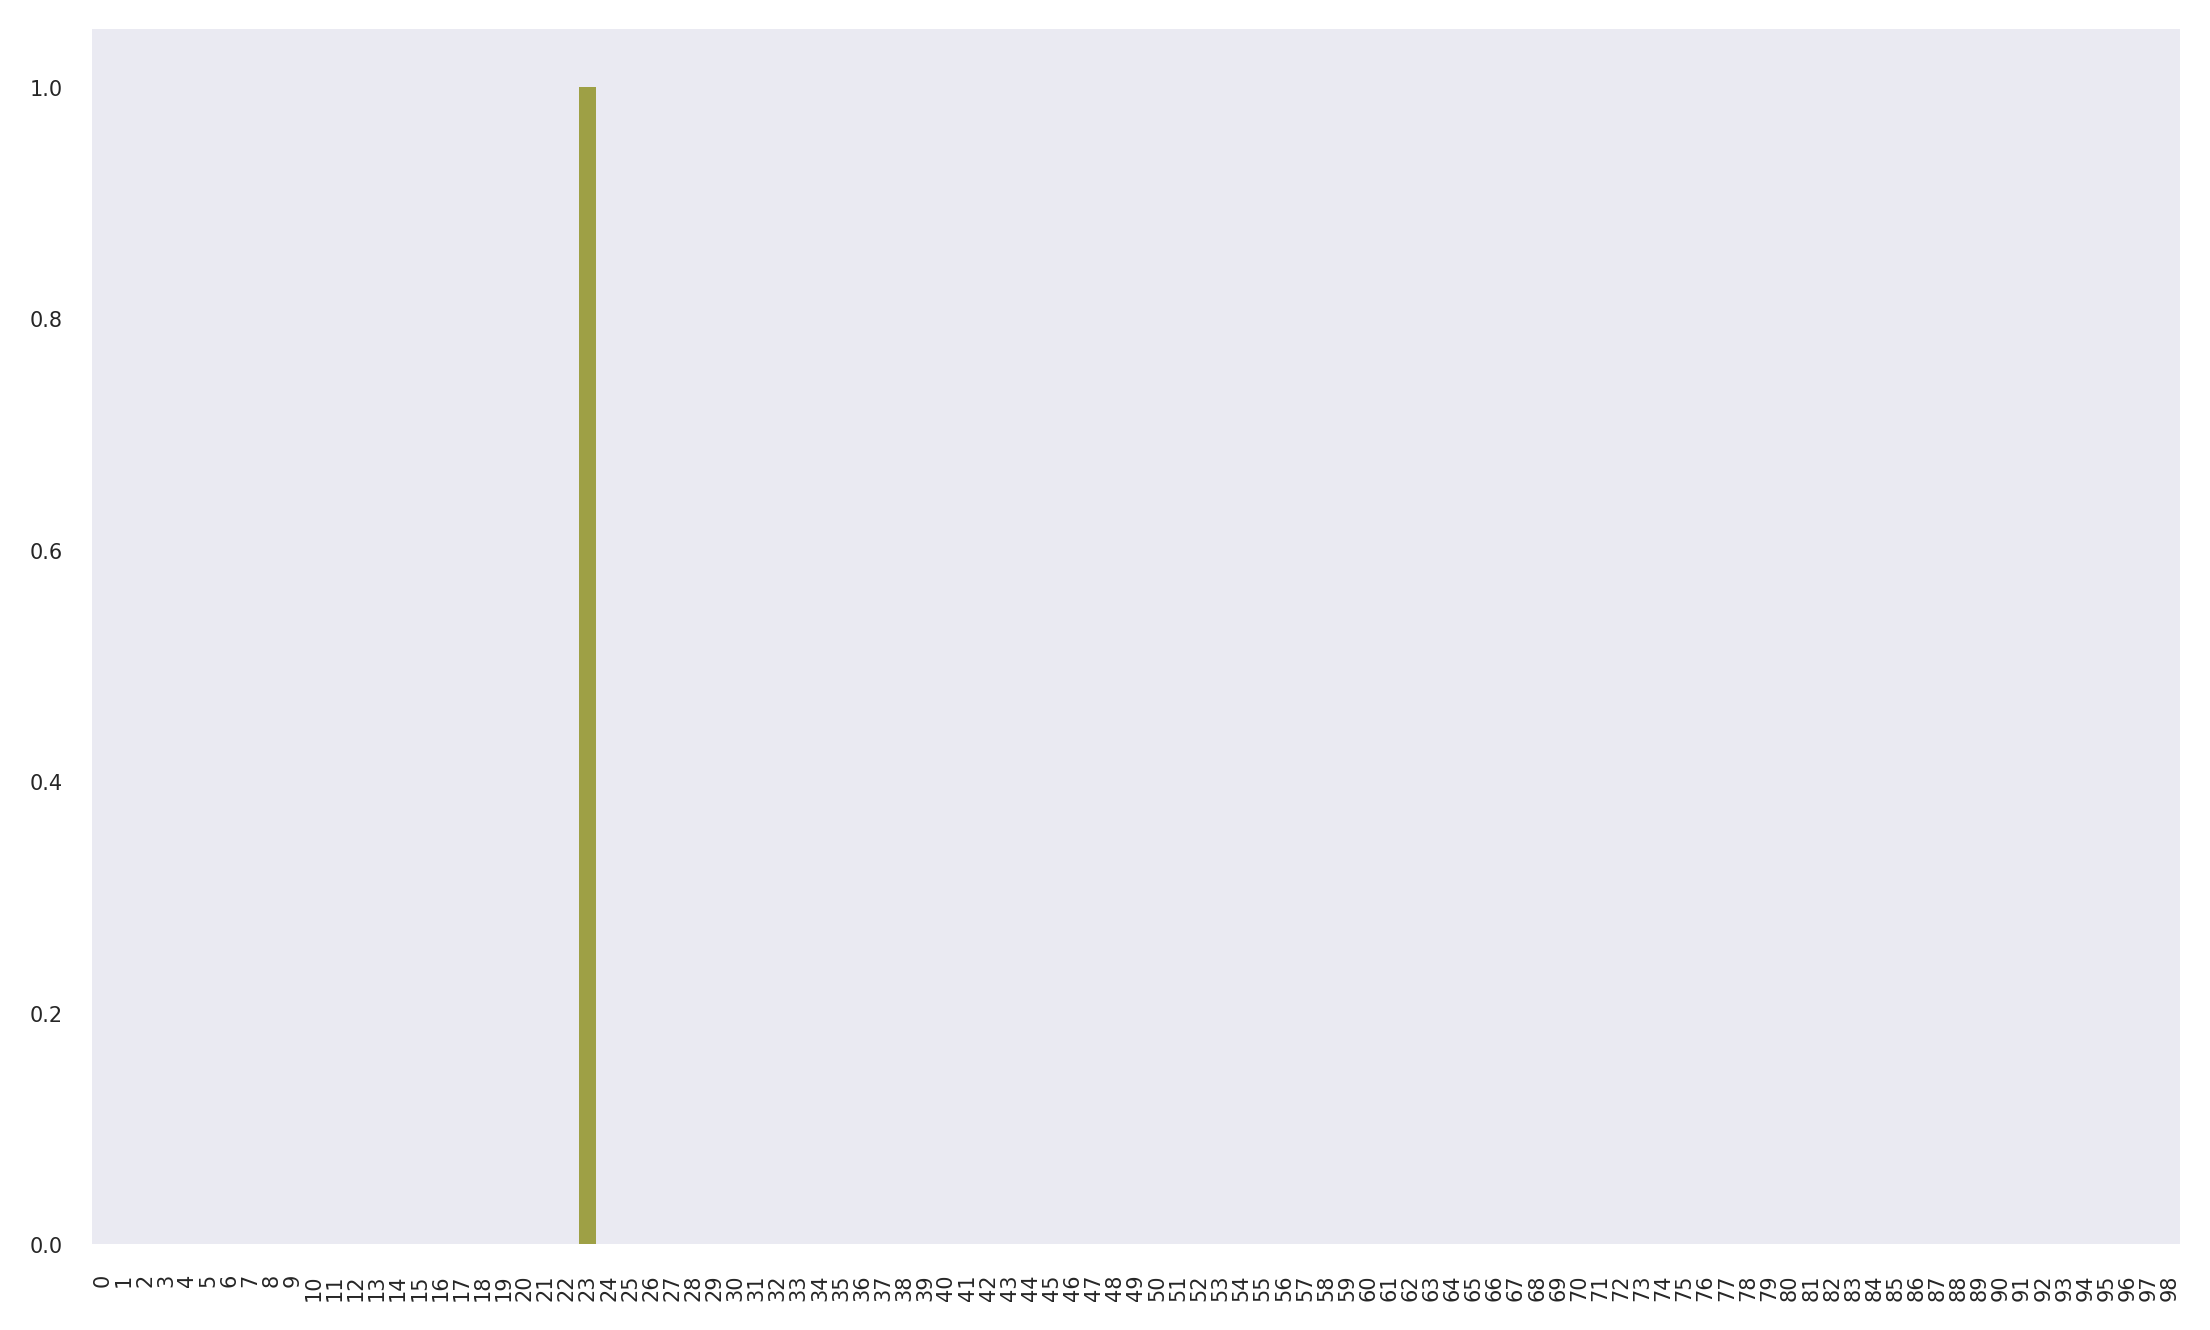

In [67]:
plt.style.use('fivethirtyeight')
sns.set(font_scale=0.5)
g = sns.barplot(x=list(range(99)), y=dfy_pred_proba[0])
g.set_xticklabels(range(99), rotation=90)
plt.grid(False)
plt.show()

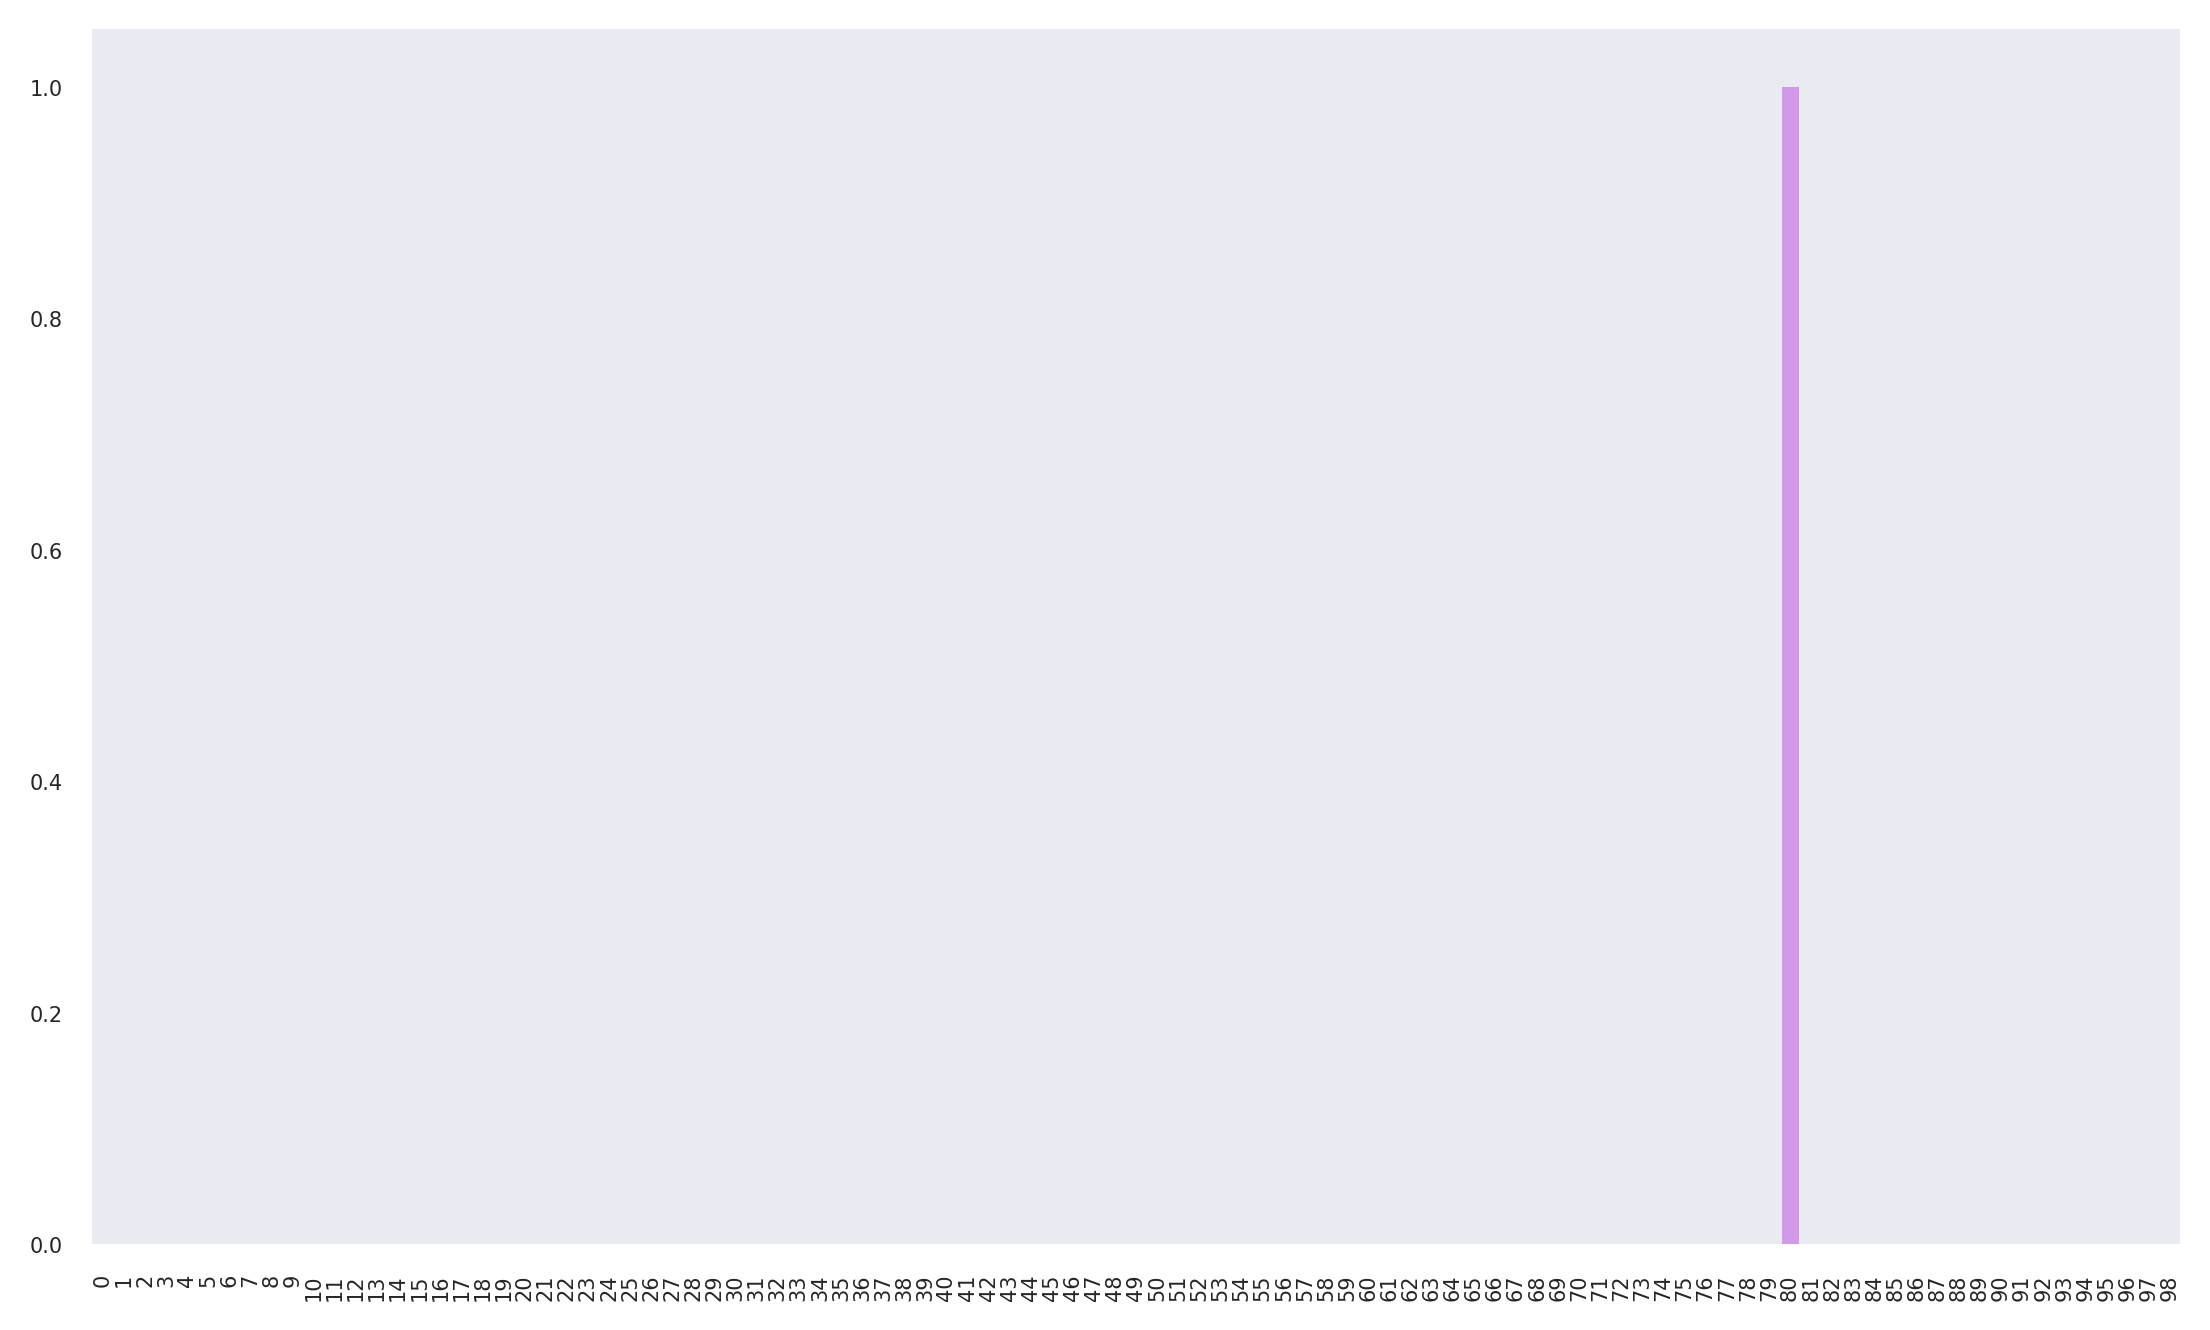

In [69]:
sns.set(font_scale=0.5)
g = sns.barplot(x=list(range(99)), y=dfy_pred_proba[1])
g.set_xticklabels(range(99), rotation=90)
plt.grid(False)
plt.show()

In [70]:
for i in range(len(dfy_pred_proba)):
    print("line" + str(i) + ": " + str(max(dfy_pred_proba[i])))

line0: 0.999933370665
line1: 0.99994172488
line2: 0.99997031684
line3: 0.999994241026
line4: 0.999971671896
line5: 0.999895116286
line6: 0.999969673704
line7: 0.99998664231
line8: 0.999902530651
line9: 0.99999841966
line10: 0.999980188044
line11: 0.999998354727
line12: 0.999996397133
line13: 0.999963945646
line14: 0.999961490704
line15: 0.99990260851
line16: 0.99994784357
line17: 0.999995962647
line18: 0.999991711387
line19: 0.999966126422
line20: 0.999998306453
line21: 0.999964856192
line22: 0.999968829197
line23: 0.999946581311
line24: 0.999999966044
line25: 0.999948978282
line26: 0.999982755804
line27: 0.999978600697
line28: 0.999968150882
line29: 0.999974770964
line30: 0.99990350157
line31: 0.999995987454
line32: 0.99992104729
line33: 0.999997244933
line34: 0.999979954082
line35: 0.999980782583
line36: 0.9999843968
line37: 0.99993751448
line38: 0.999976319229
line39: 0.99998954315
line40: 0.999955568789
line41: 0.999993816856
line42: 0.999870724594
line43: 0.999976661902
line44: 0.

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train0, y_test0 = train_test_split(dfX, dfy, test_size=0.1)

In [75]:
model1 = LogisticRegression(C=1500, tol=0.0005, class_weight='balanced', solver='lbfgs',\
                                   multi_class = 'multinomial').fit(X_train, y_train0)

In [76]:
dfy1_pred = model.predict(X_train)
dfy1_pred_proba = model.predict_proba(X_train)

In [77]:
print(confusion_matrix(y_train0, dfy1_pred))
print(classification_report(y_train0, dfy1_pred))

[[ 9  0  0 ...,  0  0  0]
 [ 0  8  0 ...,  0  0  0]
 [ 0  0  9 ...,  0  0  0]
 ..., 
 [ 0  0  0 ...,  8  0  0]
 [ 0  0  0 ...,  0 10  0]
 [ 0  0  0 ...,  0  0 10]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         9
          1       1.00      1.00      1.00         8
          2       1.00      1.00      1.00         9
          3       1.00      1.00      1.00        10
          4       1.00      1.00      1.00        10
          5       1.00      1.00      1.00        10
          6       1.00      1.00      1.00         9
          7       1.00      1.00      1.00         9
          8       1.00      1.00      1.00        10
          9       1.00      1.00      1.00         9
         10       1.00      1.00      1.00         8
         11       1.00      1.00      1.00         9
         12       1.00      1.00      1.00         8
         13       1.00      1.00      1.00         8
         14       1.00      1.00      1.

In [78]:
dfy1_test_pred = model.predict(X_test)
dfy1_test_pred_proba = model.predict_proba(X_test)

In [79]:
print(confusion_matrix(y_test0, dfy1_test_pred))
print(classification_report(y_test0, dfy1_test_pred))

[[1 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 2 0 0]
 [0 0 0 ..., 0 1 0]
 [0 0 0 ..., 0 0 2]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         1
          1       1.00      1.00      1.00         2
          2       1.00      1.00      1.00         1
          6       1.00      1.00      1.00         1
          7       1.00      1.00      1.00         1
          9       1.00      1.00      1.00         1
         10       1.00      1.00      1.00         2
         11       1.00      1.00      1.00         1
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         2
         16       1.00      1.00      1.00         1
         17       1.00      1.00      1.00         3
         18       1.00      1.00      1.00         1
         20       1.00      1.00      1.00         2
         21       1.00      1.00      1.00         1
         22       1.00 

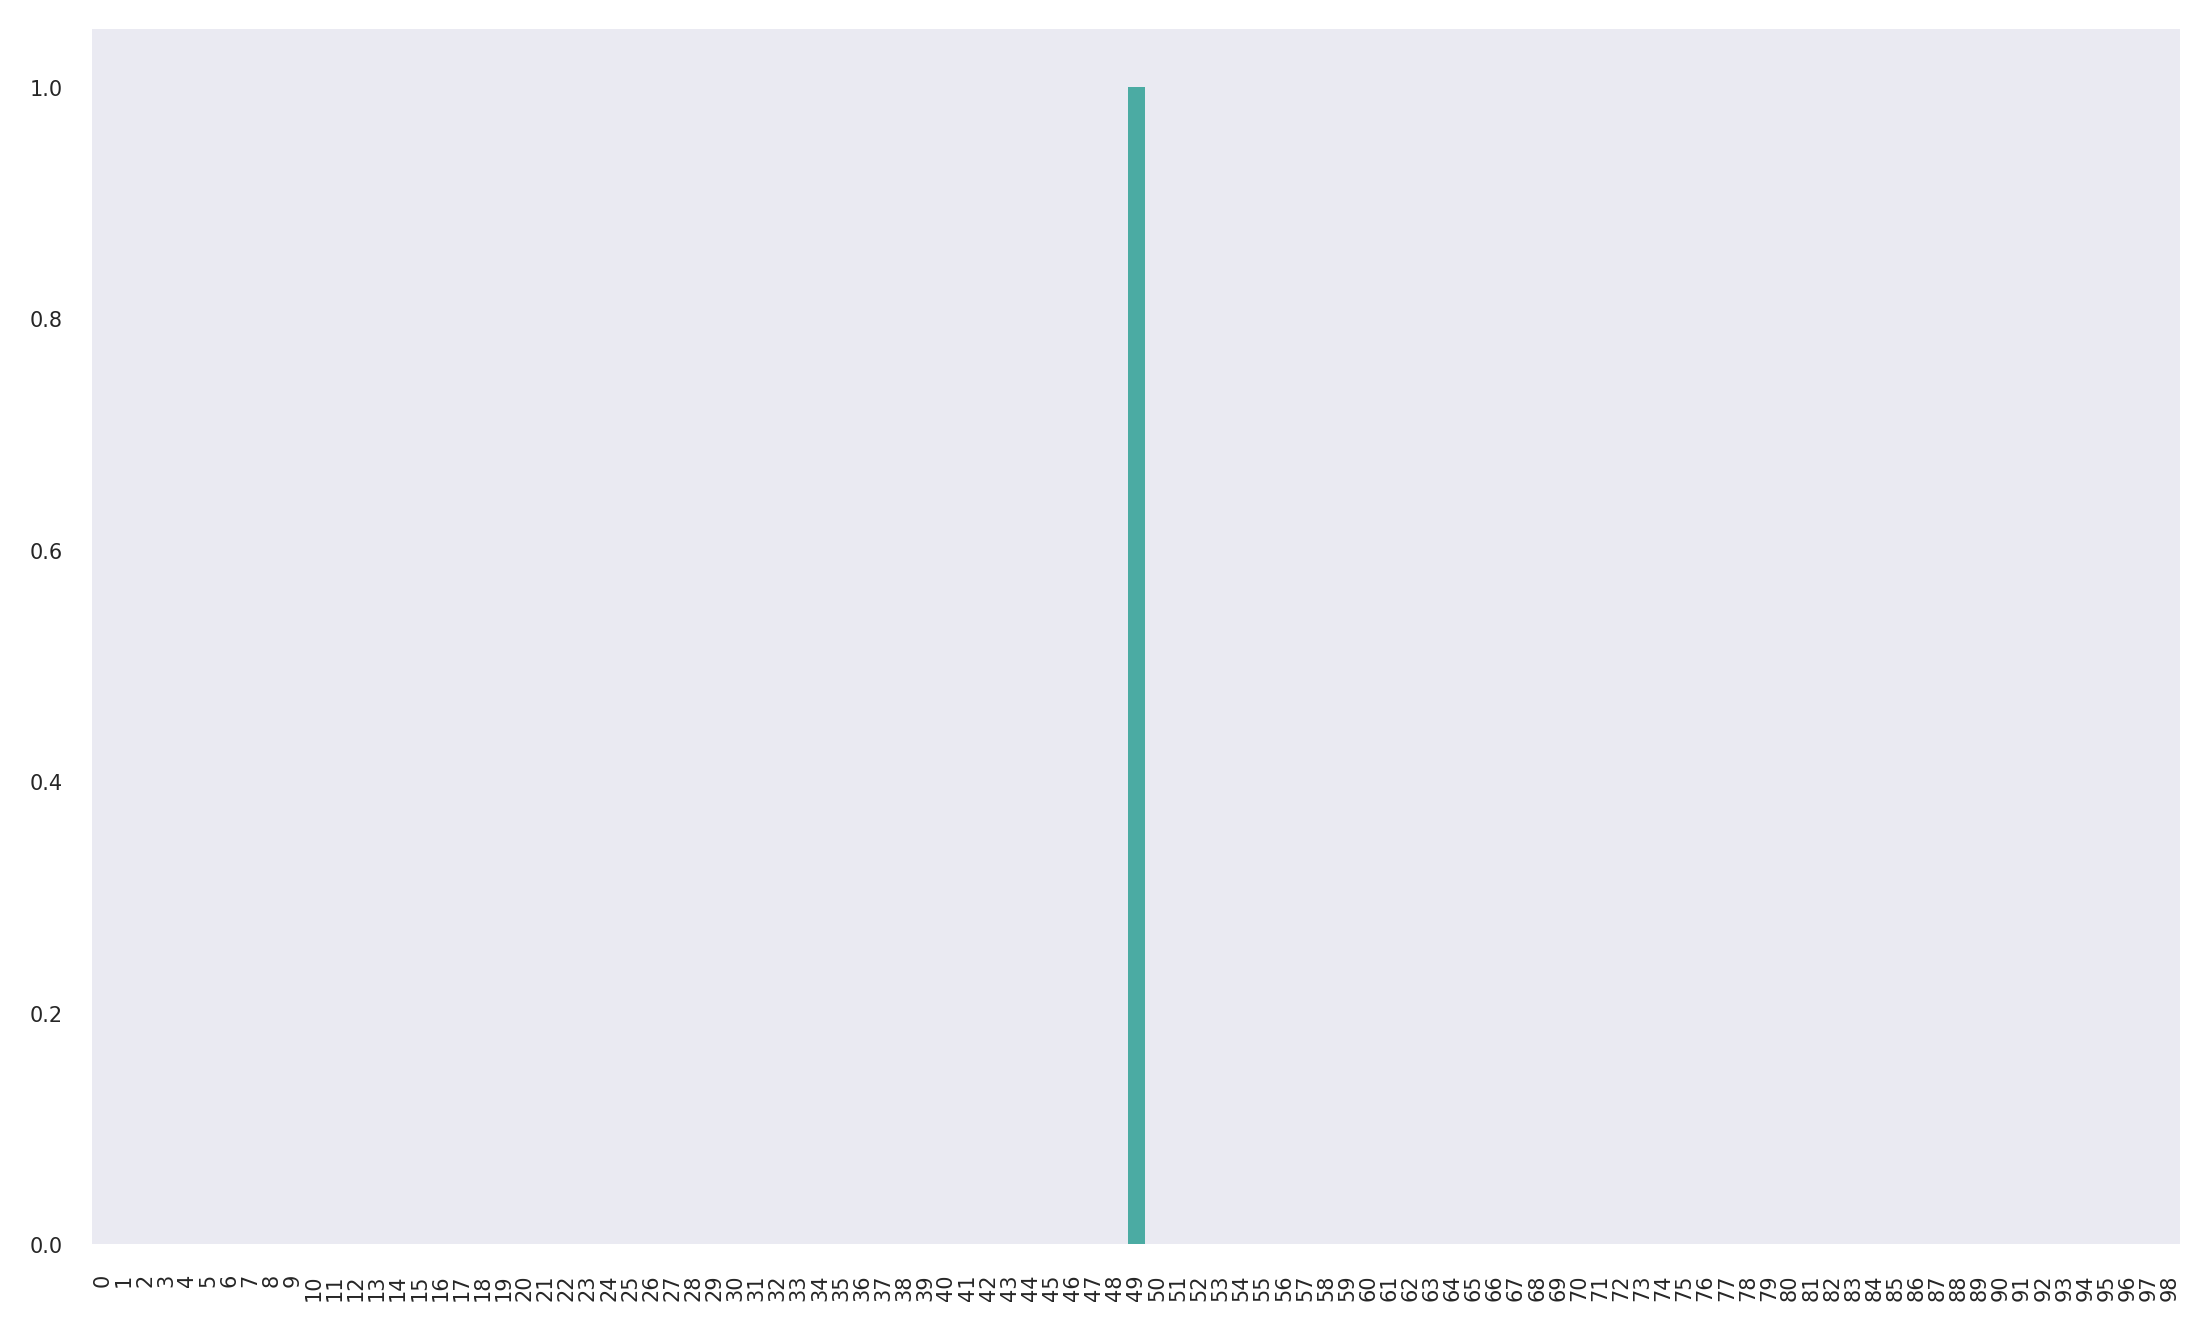

In [80]:
sns.set(font_scale=0.5)
g = sns.barplot(x=list(range(99)), y=dfy1_test_pred_proba[0])
g.set_xticklabels(range(99), rotation=90)
plt.grid(False)
plt.show()

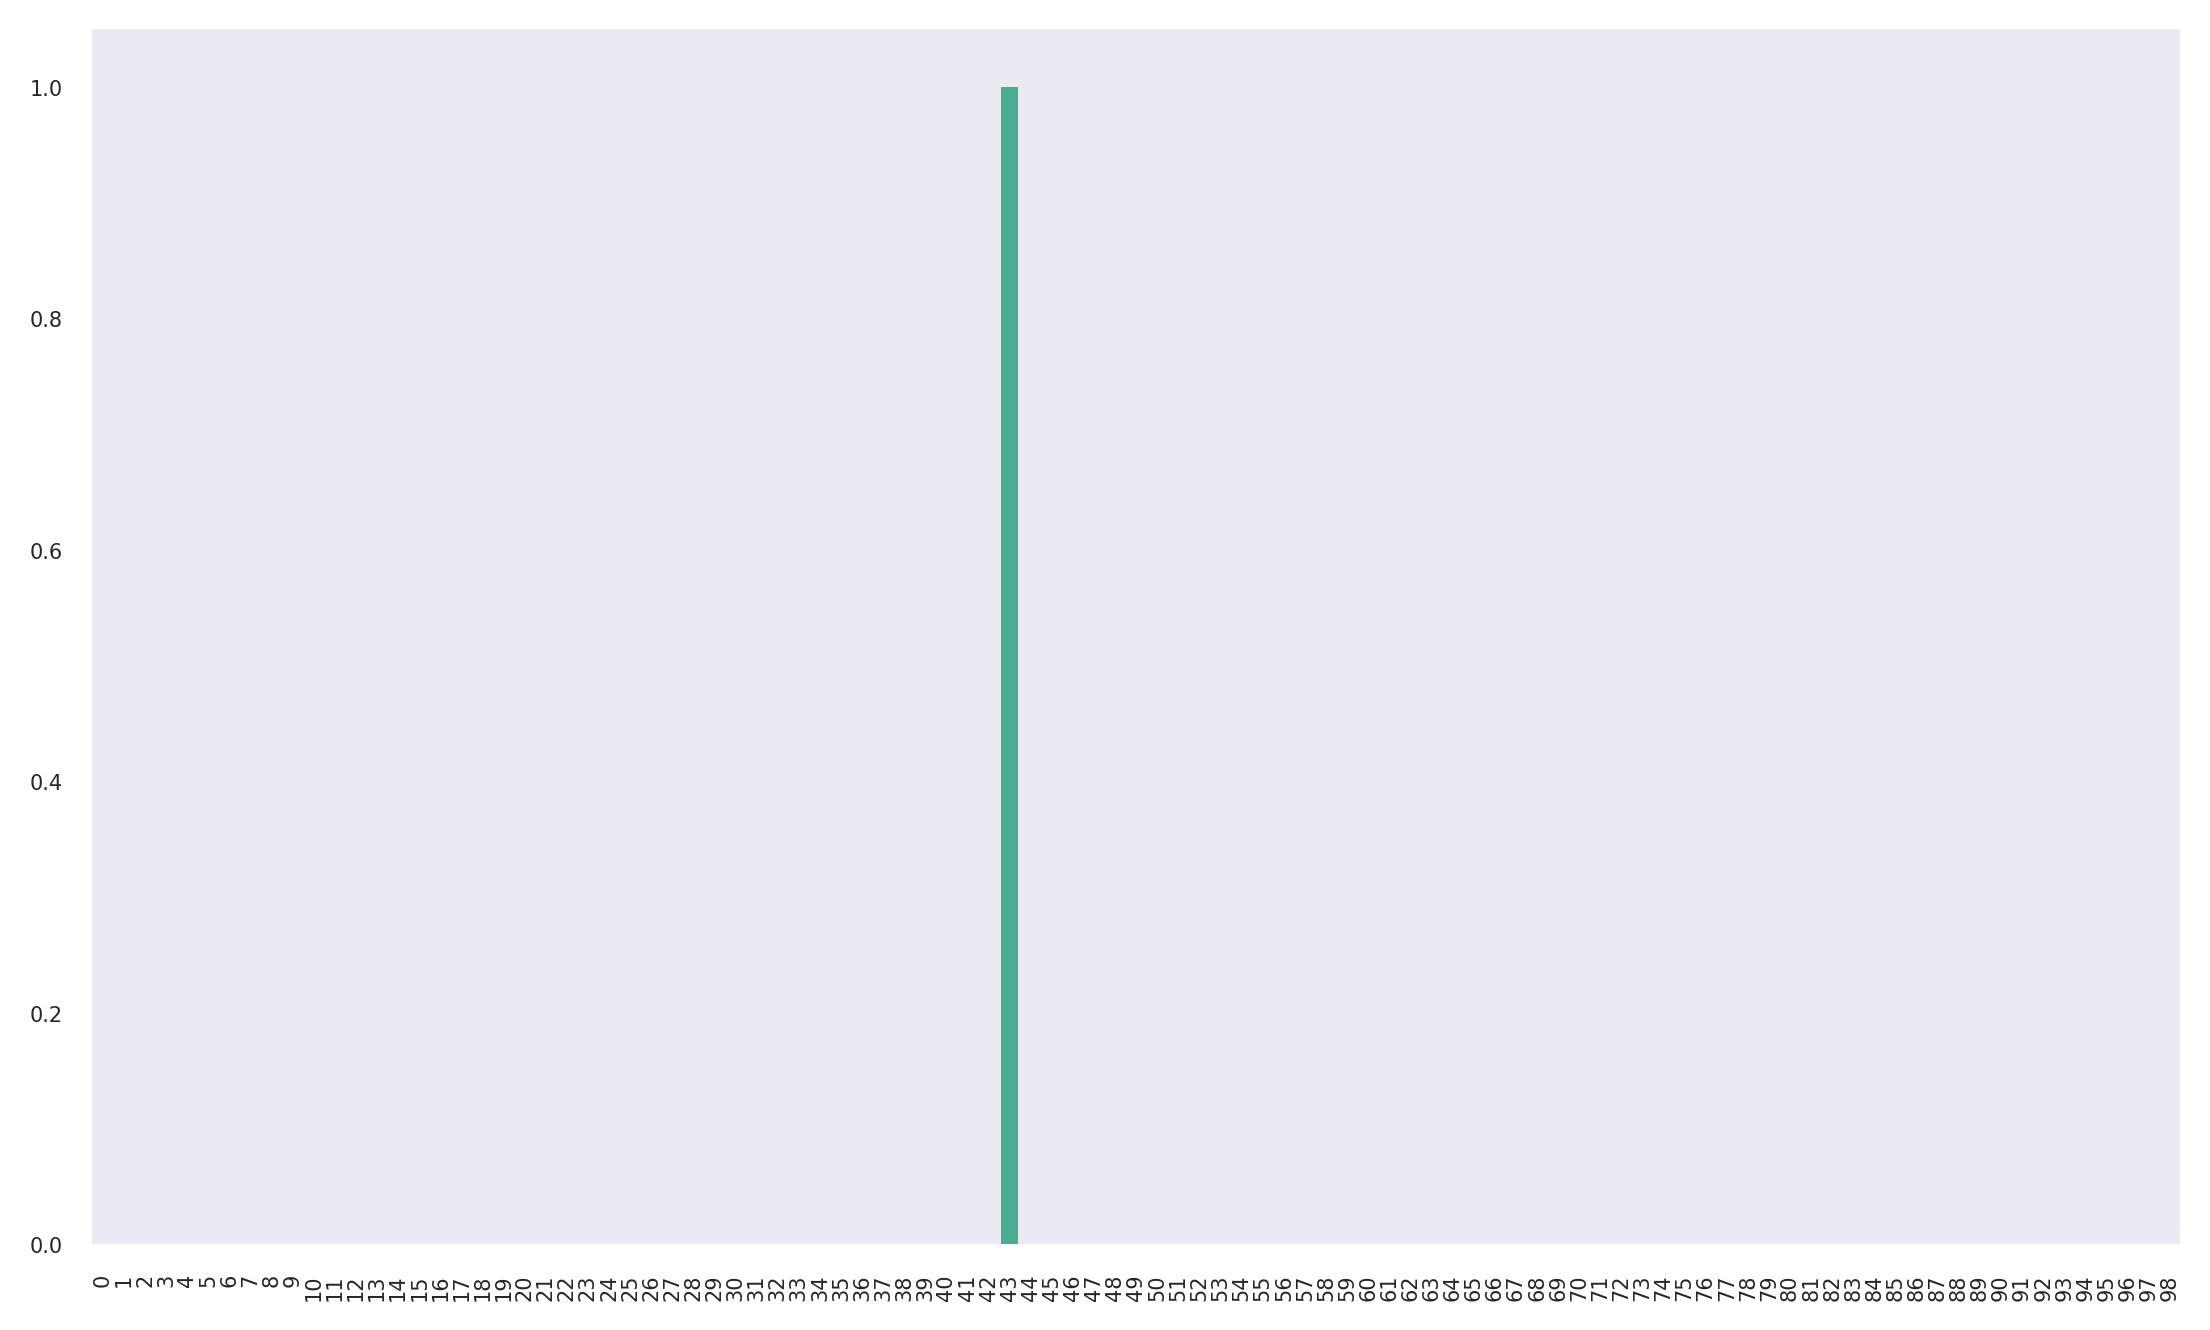

In [81]:
sns.set(font_scale=0.5)
g = sns.barplot(x=list(range(99)), y=dfy1_test_pred_proba[1])
g.set_xticklabels(range(99), rotation=90)
plt.grid(False)
plt.show()

In [82]:
for i in range(len(dfy1_test_pred_proba)):
    print("line" + str(i) + ": " + str(max(dfy1_test_pred_proba[i])))

line0: 0.999995783559
line1: 0.999953209983
line2: 0.999932149711
line3: 0.999955469777
line4: 0.999988403132
line5: 0.999961345405
line6: 0.999930965331
line7: 0.9999920719
line8: 0.999964835896
line9: 0.999968894233
line10: 0.999932606656
line11: 0.999992166029
line12: 0.999996873381
line13: 0.999938783532
line14: 0.999969753033
line15: 0.999967522701
line16: 0.999978128776
line17: 0.999999818707
line18: 0.999954308192
line19: 0.999932181146
line20: 0.999925253145
line21: 0.999999937293
line22: 0.999980580235
line23: 0.999997962289
line24: 0.999966903655
line25: 0.999967455261
line26: 0.99999881993
line27: 0.999976661902
line28: 0.999999661095
line29: 0.999965027808
line30: 0.999999217231
line31: 0.999984251835
line32: 0.999995212623
line33: 0.999990139673
line34: 0.999992090643
line35: 0.999996397133
line36: 0.999945692068
line37: 0.999963911709
line38: 0.999975749025
line39: 0.999987773709
line40: 0.999971671896
line41: 0.999991407568
line42: 0.999903819764
line43: 0.999964956875
l

In [85]:
model = LogisticRegression(C=1500, tol=0.0005, class_weight='balanced', solver = 'lbfgs', \
                                   multi_class = 'multinomial')

bc_model = BaggingClassifier(base_estimator=model, n_estimators=100, \
                                  bootstrap=True, bootstrap_features=True)

cross_val_score(bc_model,dfX, dfy, scoring='neg_log_loss', cv=10, n_jobs=2)

array([-0.05022924, -0.08977139, -0.02447745, -0.05691445, -0.0560881 ,
       -0.06082556, -0.05857529, -0.0265252 , -0.02649646, -0.0364446 ])

# Test Prediction

In [87]:
model = LogisticRegression(C=1500, tol=0.0005, class_weight='balanced', solver='lbfgs',\
                                   multi_class = 'multinomial').fit(dfX, dfy)
cross_val_score(model, dfX, dfy, scoring='neg_log_loss', cv=10)

array([-0.03355026, -0.04903544, -0.00143841, -0.01903011, -0.02847103,
       -0.02661093, -0.04901214, -0.00345704, -0.00178166, -0.00407421])

In [88]:
np.mean([-0.03355026, -0.04903544, -0.00143841, -0.01903011, -0.02847103,
       -0.02661093, -0.04901214, -0.00345704, -0.00178166, -0.00407421])

-0.021646123

In [89]:
dfy_test_pred = model.predict(dfX_test)
dfy_test_pred_proba = model.predict_proba(dfX_test)

In [90]:
dfy_test_pred_proba_df = pd.DataFrame(dfy_test_pred_proba, columns=sub_list)

In [91]:
final_submission_df = pd.concat([test_id_df, dfy_test_pred_proba_df], axis=1)
final_submission_df.to_csv('final_submission_20171121.csv', index=False)

In [ ]:
# !cat final_submission_20171121.csv

![Alt Text](result_submission_20171121.png "result")

#   
# Further
#    

> 1. SVC 개선, Keras, CNN을 적용하여 분석해보자
2. 고유분해 Eigen Value, Vector와 관련해 그래프를 그려보고 파악해보자
 https://www.kaggle.com/selfishgene/visualizing-pca-with-leaf-dataset
3. 카테고리에 PCA와 비슷하게 적용되는 Multiple correspondence analysis를 이용해보자 
https://pypi.python.org/pypi/mca/1.0.2
4. 프로그램화 하여 완성된 제품을 만들어보자